Project 10.16

In [1]:
print("Hello world ~Matt Goeckel =)")

Hello world ~Matt Goeckel =)


In [2]:
import pandas as pd

#Load the nyc temperature file
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
#Make sure it works
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [3]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


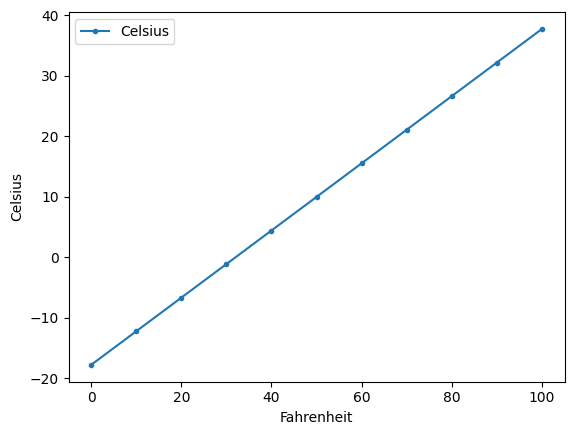

In [6]:
#Setup chart using pandas dataframe
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
#Plot C vs F
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Now time to clean the NYC data

In [7]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [8]:
nyc.Date.dtype

dtype('int64')

In [9]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [12]:
#pd.set_option('precision', 2)      #Command not compatible with this version of pd
pd.options.display.precision = 2
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Lastly we put it all together

In [14]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [18]:
#Slope value
linear_regression.slope

0.014771361132966163

In [17]:
#Intercept value
linear_regression.intercept

8.694993233674289

In [19]:
#Take a look at the calculated 2019 value
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [20]:
#Now, the 1890 calculated value
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

(10.0, 70.0)

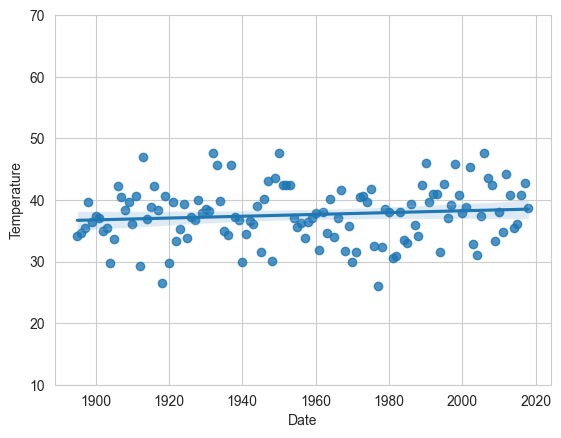

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

In [23]:
#Lastly, let's predict the 2021 max temperature, even though it's not in the set
linear_regression.slope * 2021 + linear_regression.intercept

38.54791408339891

As expected, it's slightly more than our 2019 value from a few code blocks back

And that's it! Linear regression complete ~~Matt Goeckel